In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
 
sns.set_theme(style="whitegrid")
# sns.set_theme(style="darkgrid", rc={"axes.facecolor": "lightgrey"})
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


In [3]:
model_df = pd.read_csv("2014-2024외산차data.csv", encoding = "utf-8")
model_changed_df = pd.read_csv("2014-2024외산차변화율data.csv", encoding="utf-8")
total_df = pd.read_csv("2014-2023total외산차data.csv", encoding = "utf-8")
total_2024_df = pd.read_csv("2024total.csv", encoding="utf-8")

### 0. 시각화를 위한 데이터 정제

1. foreign_total_df 컬럼 정리

In [4]:
# 연도 - 년도
# 국산자동차_등록량 - 국내생산_A시장판매량
# 수입자동차_등록량 - 수입_B시장판매량
# 수입자동차_점유율 - 수입_시장점유율
# 나머지 컬럼 drop

total_df.rename({"년도":"연도"}, axis = 1, inplace=True)
total_df.drop(total_df.columns[[0, 2, 3, 5]], axis=1, inplace=True)
total_df.rename({'국내생산_A시장판매량':"국산자동차_등록량", "수입_B시장판매량": "수입자동차_등록량", "수입_시장점유율": "수입자동차_점유율"}, axis = 1, inplace=True)

total_df

,연도,국산자동차_등록량,수입자동차_등록량,수입자동차_점유율
0,2014,"1,213,943","196,359",13.92
1,2015,"1,326,776","243,900",15.53
2,2016,"1,343,379","225,279",14.36
3,2017,"1,296,904","233,088",15.23
4,2018,"1,297,937","260,705",16.73
5,2019,"1,290,817","244,780",15.94
6,2020,"1,362,466","274,859",16.74
7,2021,"1,203,317","276,146",18.67
8,2022,"1,155,962","283,435",19.69
9,2023,"1,216,937","271,034",18.22


2. total_df, model_df 모든 컬럼값에서 콤마(,) 제거 후 숫자로 변환

In [5]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연도         10 non-null     int64  
 1   국산자동차_등록량  10 non-null     object 
 2   수입자동차_등록량  10 non-null     object 
 3   수입자동차_점유율  10 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


In [6]:
# total_df의 컬럼을 콤마(,) 제거 후 숫자로 변환
total_df['국산자동차_등록량'] = total_df['국산자동차_등록량'].replace({',': ''}, regex=True).astype(float)
total_df['수입자동차_등록량'] = total_df['수입자동차_등록량'].replace({',': ''}, regex=True).astype(float)

In [7]:
# total_df에서 국산자동차_등록량 + 수입자동차_등록량 = 전체자동차 등록량을 구하기
total_df["전체자동차_등록량"] = total_df["국산자동차_등록량"] + total_df["수입자동차_등록량"]

In [8]:
total_df.head()

,연도,국산자동차_등록량,수입자동차_등록량,수입자동차_점유율,전체자동차_등록량
0,2014,1213943.0,196359.0,13.92,1410302.0
1,2015,1326776.0,243900.0,15.53,1570676.0
2,2016,1343379.0,225279.0,14.36,1568658.0
3,2017,1296904.0,233088.0,15.23,1529992.0
4,2018,1297937.0,260705.0,16.73,1558642.0


3. model_df 컬럼 제거 및 정렬
*  년도별로 정렬 후 필요없는 컬럼 제거

In [9]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19 non-null     int64  
 1   브랜드명        19 non-null     object 
 2   2015등록대수    19 non-null     object 
 3   2015점유율     19 non-null     float64
 4   2014등록대수    19 non-null     object 
 5   2014점유율     19 non-null     float64
 6   2017등록대수    19 non-null     object 
 7   2017점유율     19 non-null     float64
 8   2016등록대수    19 non-null     object 
 9   2016점유율     19 non-null     float64
 10  2019등록대수    19 non-null     object 
 11  2019점유율     19 non-null     float64
 12  2018등록대수    19 non-null     object 
 13  2018점유율     19 non-null     float64
 14  2021등록대수    19 non-null     object 
 15  2021점유율     19 non-null     float64
 16  2020등록대수    19 non-null     object 
 17  2020점유율     19 non-null     float64
 18  2022등록대수    19 non-null     object 
 19  2022점유율     19 non-null     flo

In [10]:
# model_df의 모든 컬럼을 콤마(,) 제거 후 숫자로 변환
registration_columns = ['2014등록대수', '2015등록대수', '2016등록대수', '2017등록대수', '2018등록대수', '2019등록대수', 
                        '2020등록대수', '2021등록대수', '2022등록대수', '2023등록대수', '2024등록대수']

for col in registration_columns:
    model_df[col] = model_df[col].replace({',': ''}, regex=True).astype(int)

In [11]:
brand_column = ['브랜드명']
metric_columns = [col for col in model_df.columns if col != '브랜드명']

metric_columns = [col for col in metric_columns if col[:4].isdigit()]

sorted_columns = sorted(
    metric_columns,
    key=lambda x: (int(x[:4]), '등록대수' not in x) 
)

final_columns = brand_column + sorted_columns


model_df = model_df[final_columns]

model_df.head()

,브랜드명,2014등록대수,2014점유율,2015등록대수,2015점유율,2016등록대수,2016점유율,2017등록대수,2017점유율,2018등록대수,...,2020등록대수,2020점유율,2021등록대수,2021점유율,2022등록대수,2022점유율,2023등록대수,2023점유율,2024등록대수,2024점유율
0,Audi,27647,14.08,32538,13.34,16718,7.42,962,0.41,12450,...,25513,9.28,25615,9.28,21402,7.55,16650,6.83,8386,3.50
1,BMW,40174,20.46,47877,19.63,48459,21.51,59624,25.58,50524,...,58393,21.24,65669,23.78,78545,27.71,69546,28.52,67250,28.05
2,Bentley,322,0.16,385,0.16,170,0.08,259,0.11,215,...,296,0.11,506,0.18,775,0.27,748,0.31,340,0.14
3,Cadillac,503,0.26,886,0.36,1102,0.49,2008,0.86,2101,...,1499,0.55,987,0.36,977,0.34,859,0.35,627,0.26
4,Ford,8718,4.44,10358,4.25,11220,4.98,10727,4.60,11586,...,7069,2.57,6721,2.43,5300,1.87,3141,1.29,3484,1.45


4. total_2024_df컬럼명 변환 및 데이터 타입 변환
* 컬럼: 2024->연도로 변환

In [12]:
# model_df의 모든 컬럼을 콤마(,) 제거 후 숫자로 변환
total_2024_df['국내자동차_등록량'] = total_2024_df['국내자동차_등록량'].replace({',': ''}, regex=True).astype(float)
total_2024_df['수입자동차_등록량'] = total_2024_df['수입자동차_등록량'].replace({',': ''}, regex=True).astype(float)
total_2024_df.rename({"2024":"연도"}, axis = 1, inplace=True)
total_2024_df["연도"] = 2024
total_2024_df.drop(total_2024_df.columns[0], axis=1, inplace=True)

total_2024_df

,연도,국내생산량,국내생산_수출량,국내자동차_등록량,수입자동차_등록량,수입차_점유율
0,2024,"3,497,107","2,447,370",1069452.0,239764.0,18.31


### 1 .현재 국내 전체차량 등록 현황 및 외산차 점유율

In [13]:
plot_2024_df = pd.DataFrame()
plot_2024_df["전체자동차_등록량"] = total_2024_df["국내자동차_등록량"] + total_2024_df["수입자동차_등록량"]
plot_2024_df["수입자동차_등록량"] = total_2024_df["수입자동차_등록량"]

plot_2024_df

,전체자동차_등록량,수입자동차_등록량
0,1309216.0,239764.0


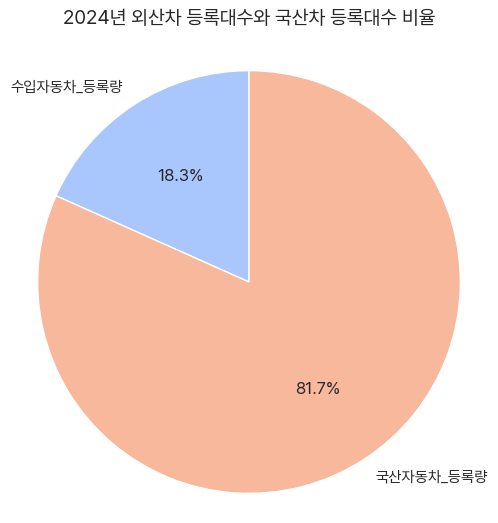

In [14]:
labels = ['수입자동차_등록량', '국산자동차_등록량']
sizes = [
    plot_2024_df['수입자동차_등록량'].iloc[0], 
    plot_2024_df['전체자동차_등록량'].iloc[0] - plot_2024_df['수입자동차_등록량'].iloc[0]
]

colors = sns.color_palette('coolwarm', len(labels))

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("2024년 외산차 등록대수와 국산차 등록대수 비율", fontsize=14, pad=20)
plt.axis('equal') 
plt.show()

### 2. 현재 브랜드별 국내 외산차 등록현황 및 외산차 TOP5기업 정유율

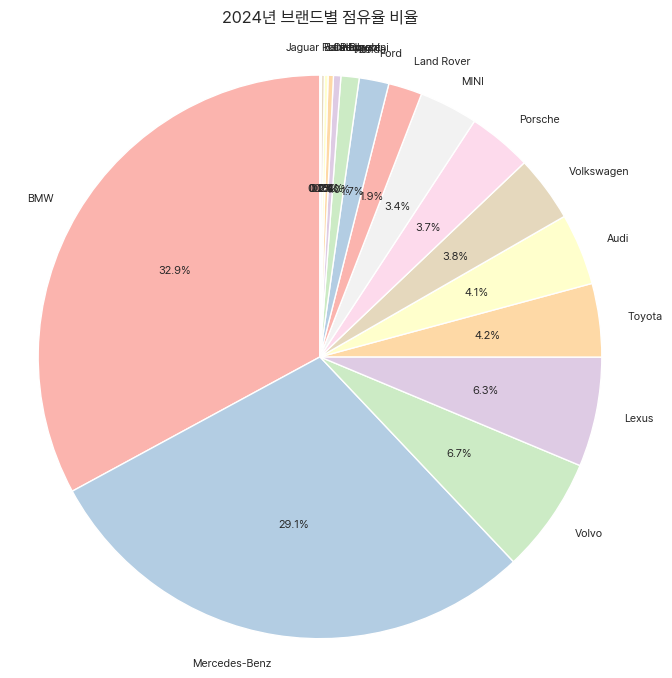

In [15]:
model_df_2024 = model_df[['브랜드명', '2024등록대수', '2024점유율']]
model_df_2024 = model_df_2024[model_df_2024["브랜드명"] != "Total"]
model_df_2024 = model_df_2024.sort_values(by="2024점유율", ascending=False)

colors = sns.color_palette('Pastel1', len(model_df_2024["브랜드명"]))

# 2024 점유율 원그래프
plt.figure(figsize=(8, 8))
plt.pie(model_df_2024['2024점유율'], labels=model_df_2024['브랜드명'], autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 8})  
plt.title('2024년 브랜드별 점유율 비율', fontsize=12, pad=20)  
plt.axis('equal')  
plt.show()

* 브랜드가 많다보니 원그래프로 플롯할 때 글자크기를 조정해도 글자가 겹치는 이슈가 발생한다. 1프로 미만의 점유율을 가지는 브랜드들은 기타로 합친후 그래프를 그려야할 것 같다.

In [16]:
guitar = model_df_2024[model_df_2024['2024점유율'] <= 1]
plot_model_2024 = model_df_2024[model_df_2024['2024점유율'] > 1]

new_row = pd.DataFrame({
    "브랜드명": ["기타"],
    "2024등록대수": [guitar["2024등록대수"].sum()],
    "2024점유율": [guitar["2024점유율"].sum()]
})

plot_model_2024 = pd.concat([plot_model_2024, new_row], ignore_index=True)

plot_model_2024

,브랜드명,2024등록대수,2024점유율
0,BMW,67250,28.05
1,Mercedes-Benz,59561,24.84
2,Volvo,13603,5.67
3,Lexus,12849,5.36
4,Toyota,8614,3.59
5,Audi,8386,3.50
6,Volkswagen,7734,3.23
7,Porsche,7516,3.13
8,MINI,6888,2.87
9,Land Rover,3958,1.65


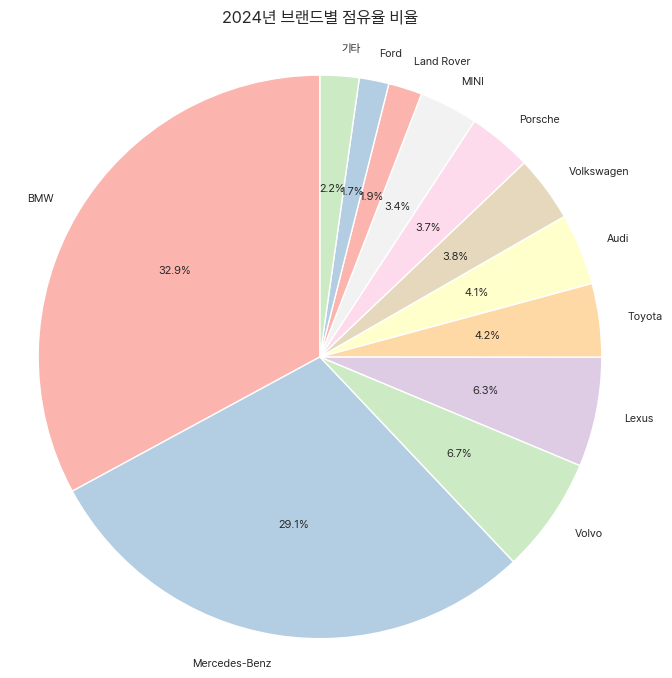

In [17]:
colors = sns.color_palette('Pastel1', len(plot_model_2024["브랜드명"]))

# 2024 점유율 원그래프
plt.figure(figsize=(8, 8))
plt.pie(plot_model_2024['2024점유율'], labels=plot_model_2024['브랜드명'], autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 8})  #
plt.title('2024년 브랜드별 점유율 비율', fontsize=12, pad=20)  
plt.axis('equal')  
plt.show()

* 2024 브랜드별 등록대수 plot

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24128\185514685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_model_2024, x='브랜드명', y='2024등록대수', palette=colors)


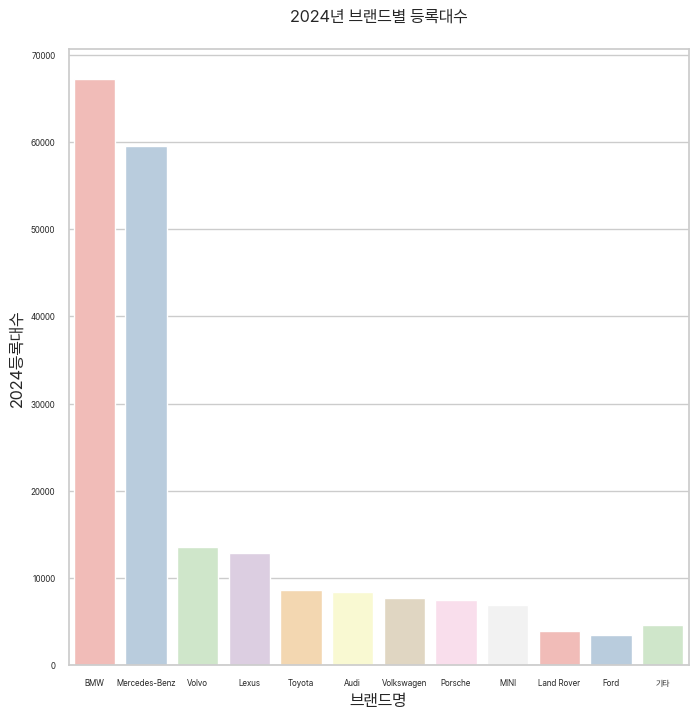

In [18]:
colors = sns.color_palette('Pastel1', len(plot_model_2024["브랜드명"]))

plt.figure(figsize=(8, 8))
sns.barplot(data=plot_model_2024, x='브랜드명', y='2024등록대수', palette=colors)

# 텍스트 크기 조정
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)  


plt.title('2024년 브랜드별 등록대수', fontsize=12, pad=20)
plt.show()

* 2024 Top 5 수입차 브랜드

In [19]:
plot_model_2024.head(5)

,브랜드명,2024등록대수,2024점유율
0,BMW,67250,28.05
1,Mercedes-Benz,59561,24.84
2,Volvo,13603,5.67
3,Lexus,12849,5.36
4,Toyota,8614,3.59


### 3. 과거 10년간 국내 전체차량 등록현황 및 외산차 점유율

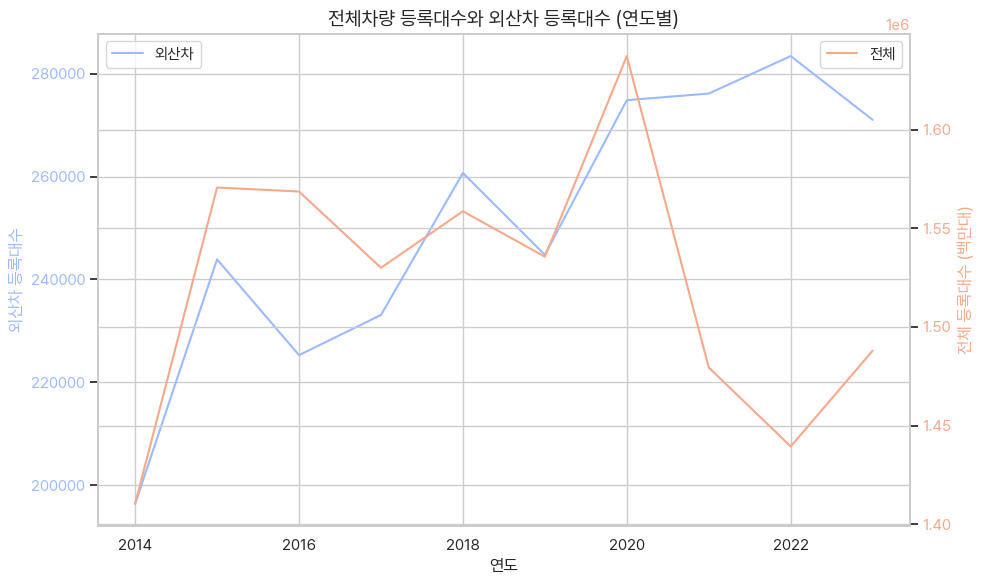

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = sns.color_palette('coolwarm')

# 첫 번째 y축 (외산차 등록대수)
sns.lineplot(data=total_df, x="연도", y="수입자동차_등록량", ax=ax1, label="외산차", color=colors[1])
ax1.set_xlabel("연도", fontsize=12)
ax1.set_ylabel("외산차 등록대수", fontsize=12, color=colors[1])
ax1.tick_params(axis="y", labelcolor=colors[1])

# 두 번째 y축 (전체 등록대수)
ax2 = ax1.twinx()
sns.lineplot(data=total_df, x="연도", y="전체자동차_등록량", ax=ax2, label="전체", color=colors[4])
ax2.set_ylabel("전체 등록대수 (백만대)", fontsize=12, color=colors[4])
ax2.tick_params(axis="y", labelcolor=colors[4])

plt.title("전체차량 등록대수와 외산차 등록대수 (연도별)", fontsize=14)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

### 4. 과거 10년간 브랜드별 외산차 점유율 변화

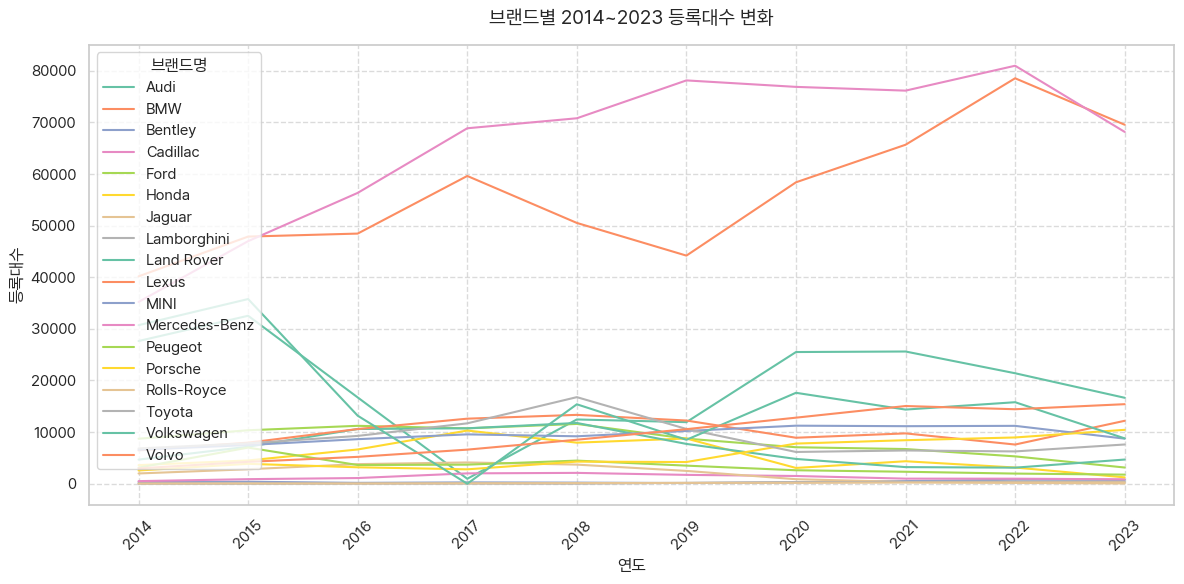

In [335]:
model_df_등록대수 = model_df.loc[:, model_df.columns.str.contains('등록대수') | (model_df.columns == '브랜드명')]
model_df_등록대수 = model_df_등록대수[model_df_등록대수["브랜드명"] != "Total"]

df_melted = model_df_등록대수.melt(id_vars=['브랜드명'], var_name='연도', value_name='등록대수')


df_melted['연도'] = df_melted['연도'].str.replace('등록대수', '')
df_filtered = df_melted[df_melted['연도'] != '2024']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='연도', y='등록대수', hue='브랜드명', palette='Set2')

plt.title('브랜드별 2014~2023 등록대수 변화', fontsize=14, pad=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('등록대수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='브랜드명', loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.show()

* 10년간 TOP5브랜드가 어떻게 변화했는지 보기 위해 데이터프레임 새로 생성

In [24]:
model_df

,브랜드명,2014등록대수,2014점유율,2015등록대수,2015점유율,2016등록대수,2016점유율,2017등록대수,2017점유율,2018등록대수,...,2020등록대수,2020점유율,2021등록대수,2021점유율,2022등록대수,2022점유율,2023등록대수,2023점유율,2024등록대수,2024점유율
0,Audi,27647,14.08,32538,13.34,16718,7.42,962,0.41,12450,...,25513,9.28,25615,9.28,21402,7.55,16650,6.83,8386,3.50
1,BMW,40174,20.46,47877,19.63,48459,21.51,59624,25.58,50524,...,58393,21.24,65669,23.78,78545,27.71,69546,28.52,67250,28.05
2,Bentley,322,0.16,385,0.16,170,0.08,259,0.11,215,...,296,0.11,506,0.18,775,0.27,748,0.31,340,0.14
3,Cadillac,503,0.26,886,0.36,1102,0.49,2008,0.86,2101,...,1499,0.55,987,0.36,977,0.34,859,0.35,627,0.26
4,Ford,8718,4.44,10358,4.25,11220,4.98,10727,4.60,11586,...,7069,2.57,6721,2.43,5300,1.87,3141,1.29,3484,1.45
5,Honda,3601,1.83,4511,1.85,6636,2.95,10299,4.42,7956,...,3056,1.11,4355,1.58,3140,1.11,1234,0.51,2145,0.89
6,Jaguar,1989,1.01,2804,1.15,3798,1.69,4125,1.77,3701,...,875,0.32,338,0.12,163,0.06,54,0.02,0,0.00
7,Lamborghini,0,0.00,4,0.00,20,0.01,24,0.01,11,...,303,0.11,353,0.13,403,0.14,384,0.16,433,0.18
8,Land Rover,4675,2.38,7171,2.94,10601,4.71,10740,4.61,11772,...,4801,1.75,3220,1.17,3113,1.10,4684,1.92,3958,1.65
9,Lexus,6464,3.29,7956,3.26,10594,4.70,12603,5.41,13340,...,8911,3.24,9752,3.53,7592,2.68,12191,5.00,12849,5.36


In [26]:
filtered_df = model_df[model_df['브랜드명'] != 'Total']
filtered_df.drop(columns=["2024등록대수", "2024점유율"], inplace=True)
years = [col.replace('등록대수', '') for col in filtered_df.columns if '등록대수' in col]

top5_counts = []  # 등록대수 Top 5
top5_shares = []  # 점유율 Top 5

for year in years:
    # 등록대수 Top 5 브랜드
    df_counts = filtered_df[['브랜드명', f'{year}등록대수']].sort_values(by=f'{year}등록대수', ascending=False).head(5)
    top5_counts.append(df_counts['브랜드명'].values)

    # 점유율 Top 5 브랜드
    df_shares = filtered_df[['브랜드명', f'{year}점유율']].sort_values(by=f'{year}점유율', ascending=False).head(5)
    top5_shares.append(df_shares['브랜드명'].values)

# 새로운 데이터프레임 생성
top5_counts_df = pd.DataFrame(top5_counts, index=years, columns=['Top1', 'Top2', 'Top3', 'Top4', 'Top5'])
top5_shares_df = pd.DataFrame(top5_shares, index=years, columns=['Top1', 'Top2', 'Top3', 'Top4', 'Top5'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24128\684514352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=["2024등록대수", "2024점유율"], inplace=True)


In [27]:

top5_counts_df

,Top1,Top2,Top3,Top4,Top5
2014,BMW,Mercedes-Benz,Volkswagen,Audi,Ford
2015,BMW,Mercedes-Benz,Volkswagen,Audi,Ford
2016,Mercedes-Benz,BMW,Audi,Volkswagen,Ford
2017,Mercedes-Benz,BMW,Lexus,Toyota,Land Rover
2018,Mercedes-Benz,BMW,Toyota,Volkswagen,Lexus
2019,Mercedes-Benz,BMW,Lexus,Audi,Toyota
2020,Mercedes-Benz,BMW,Audi,Volkswagen,Volvo
2021,Mercedes-Benz,BMW,Audi,Volvo,Volkswagen
2022,Mercedes-Benz,BMW,Audi,Volkswagen,Volvo
2023,BMW,Mercedes-Benz,Audi,Volvo,Lexus


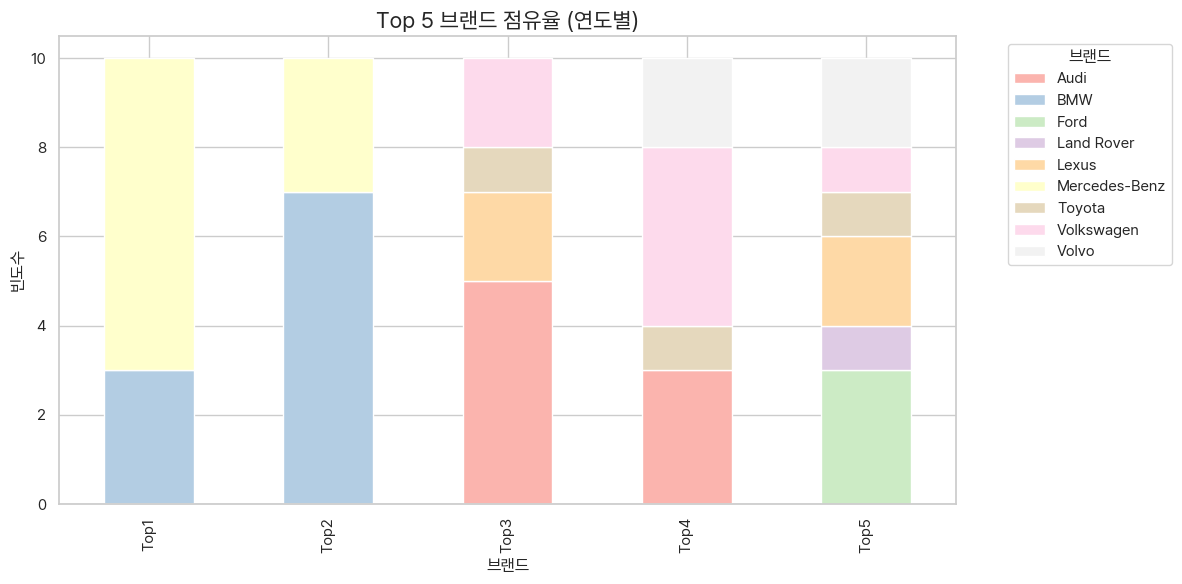

In [28]:
brand_counts = top5_counts_df.apply(pd.Series.value_counts).fillna(0)
colors = sns.color_palette('Pastel1', len(plot_model_2024["브랜드명"]))

# 시각화
brand_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Top 5 브랜드 점유율 (연도별)', fontsize=16)
plt.xlabel('브랜드', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.legend(title='브랜드', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [220]:
# model_df.to_csv('2014-2024브랜드.csv')

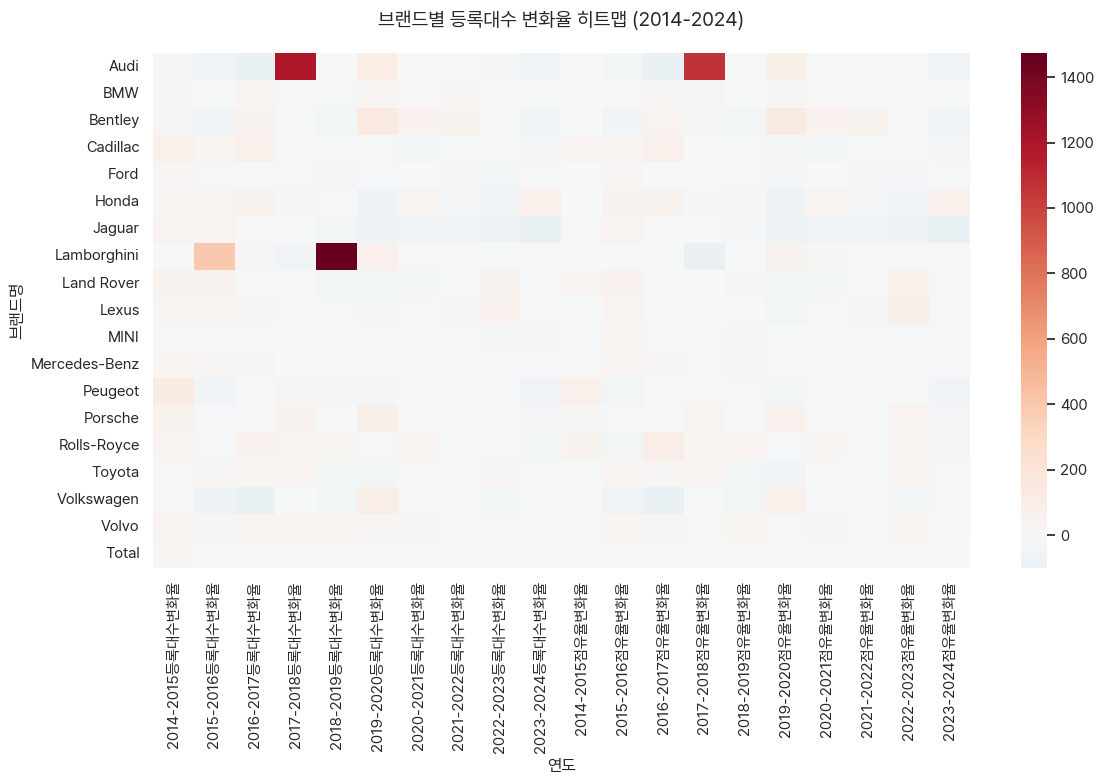

In [29]:
model_changed_df_melted = model_changed_df.drop(columns=["Unnamed: 0", "브랜드명"])
model_changed_df_melted['브랜드명'] = model_changed_df['브랜드명']
model_changed_df_melted = model_changed_df_melted.set_index('브랜드명')

# 히트맵 그리기 (diverging 색상 팔레트를 사용하여 양/음 구분)
plt.figure(figsize=(12, 8))
sns.heatmap(model_changed_df_melted, annot=False, cmap="RdBu_r", center=0, cbar=True)

plt.title('브랜드별 등록대수 변화율 히트맵 (2014-2024)', fontsize=14, pad=20)
plt.xlabel('연도', fontsize=12)
plt.ylabel('브랜드명', fontsize=12)

plt.tight_layout()
plt.show()